In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [24]:
%%time
# Importing the csv 
business = pd.read_csv('business.csv')

# Displaying the first 5 lines of the csv 
business.head(10)

CPU times: user 2.42 s, sys: 507 ms, total: 2.93 s
Wall time: 4.31 s


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726649,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
6,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118,36.063977,-115.241463,3.5,81,1,"{'BusinessParking': ""{'garage': False, 'street...","Dry Cleaning & Laundry, Local Services, Laundr...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."
7,ScYkbYNkDgCneBrD9vqhCQ,Junction Tire & Auto Service,6910 E Southern Ave,Mesa,AZ,85209,33.393885,-111.682226,5.0,18,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Auto Repair, Oil Change Stations, Automotive, ...","{'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'..."
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,Toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Martial Arts, Gyms, Fitness & Instruction, Act...","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."


Some of the first observations we make here are as follows:

1. `business_id` is unique
2. Business names
3. Addresses
4. City
5. State
6. Postal Code
7. Latitude
8. Longitude
9. Review / Stars
10. Total review count
11. `is_open` if business is open or not
12. Attributes comprises of business attributes so will need to be split up into sub-categories
13. Categories seem to be mixed and will have to be one hot encoded. 
14. The hour column includes timing in a 24-hour format and may have missing values. 

In [100]:
# Let's take a look at the different datatypes and columns and explore this before we move on to new data frames. 
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
business_id     209393 non-null object
name            209393 non-null object
address         209393 non-null object
city            209393 non-null object
state           209393 non-null object
postal_code     208884 non-null object
latitude        209393 non-null float64
longitude       209393 non-null float64
stars           209393 non-null float64
review_count    209393 non-null int64
is_open         209393 non-null bool
attributes      209393 non-null object
categories      209393 non-null object
hours           209393 non-null object
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 21.0+ MB


It seems like altogether, we have about 209,393 rows altogether. However, it does seem like there are some null values in our data set. We'll have to see if these can be dropped, filled, or be left as is. Though we must keep in mind that if we were to drop these rows with null values, it could lead to potential data loss because 


Also,before we go any further, let's change the datatypes accordingly.

In [99]:
# Changing the datatypes
# Converting to string
business['business_id'] = business['business_id'].astype('str')
# Converting to string
business['name'] = business['name'].astype('str')
# Converting to string
business['address'] = business['address'].astype('str')
# Converting to string
business['city'] = business['city'].astype('str')
# Converting to string
business['state'] = business['state'].astype('str')
# Converting to float64
business['latitude'] = business['latitude'].astype('float64')
# Converting to float64
business['longitude'] = business['longitude'].astype('float64')
# Converting to float64
business['stars'] = business['stars'].astype('float64')
# Converting to int64
business['review_count'] = business['review_count'].astype('int64')
# Converting to bool
business['is_open'] = business['is_open'].astype('bool')
# Converting to string
business['attributes'] = business['attributes'].astype('str')
# Converting to string
business['categories'] = business['categories'].astype('str')
# Converting to string
business['hours'] = business['hours'].astype('str')


In [101]:
business.describe()

,latitude,longitude,stars,review_count
count,209393.000000,209393.000000,209393.000000,209393.000000
mean,38.579934,-97.390217,3.538055,36.937505
std,4.940448,16.718535,1.023543,123.343597
min,21.497258,-158.025525,1.000000,3.000000
25%,33.638658,-112.269476,3.000000,4.000000
50%,36.147408,-111.743531,3.500000,9.000000
75%,43.611693,-79.972679,4.500000,27.000000
max,51.299943,-72.806550,5.000000,10129.000000


In [102]:
# Let's put the number of missing points and it's percetange of total data in tabular format to see what might our options be
business.isna().sum()/len(business)

business_id     0.000000
name            0.000000
address         0.000000
city            0.000000
state           0.000000
postal_code     0.002431
latitude        0.000000
longitude       0.000000
stars           0.000000
review_count    0.000000
is_open         0.000000
attributes      0.000000
categories      0.000000
hours           0.000000
dtype: float64

In [63]:
# Let's now take a look at the number of nulls 
col = 'a'

Null_Points = business.isna().sum()
Null_Percentage = business.isna().sum()/len(business)

data = {'Null Points' : Null_Points, 'Null Percentage' : Null_Percentage}
missing_points = pd.DataFrame(data, columns = data)
missing_points

,Null Points,Null Percentage
business_id,0,0.000000
name,1,0.000005
address,8679,0.041448
city,2,0.000010
state,0,0.000000
postal_code,509,0.002431
latitude,0,0.000000
longitude,0,0.000000
stars,0,0.000000
review_count,0,0.000000


Let's do a column by column exploration. The flow will be as follows:
- Stars
- review_count
- is_open
- attributes
- categories
- hours

You might notice a few columns are being skipped, this is because a business_id is unique to every business, so is the name, the address (might over lap but will have a different unit), city/state/postal code along with the latitutde and longitude. The reason we want to look at the above columns is as it'll help us understand the distribution of businesses and reviews within the dataset. 

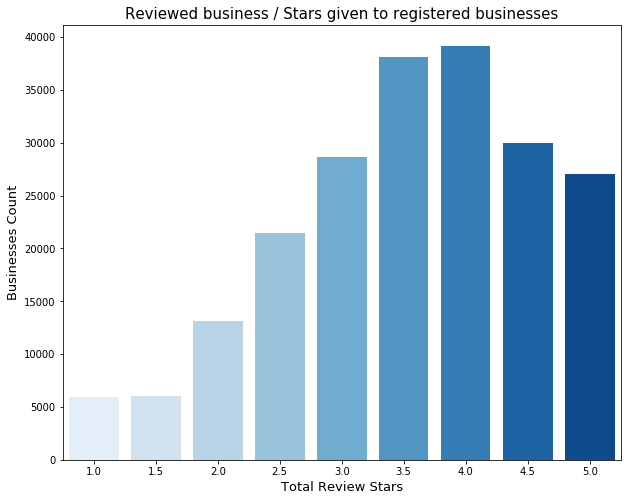

In [103]:
# Let's take a look at distribution of stars for Yelp businesses
plt.figure(figsize = (10,8))
sns.countplot(business['stars'], palette = 'Blues', saturation = 0.9)
plt.title('Reviewed business / Stars given to registered businesses', fontsize = 15)
plt.xlabel('Total Review Stars', fontsize = 13)
plt.ylabel('Businesses Count', fontsize = 13)
plt.show()

In [104]:
# Let's take a look at distribution of stars for Yelp businesses
plt.figure(figsize = (10,8))
sns.countplot(business['review_count'], palette = 'Blues', saturation = 0.9)
plt.title('Reviewed business / Stars given to registered businesses', fontsize = 15)
plt.xlabel('Total Review Stars', fontsize = 13)
plt.ylabel('Businesses Count', fontsize = 13)
plt.show()

KeyboardInterrupt: 

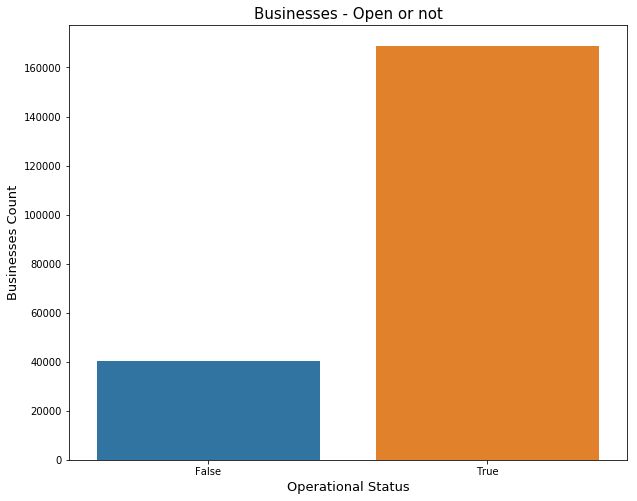

In [105]:
# Let's take a look at distribution of stars for Yelp businesses
plt.figure(figsize = (10,8))
sns.countplot(business['is_open'])
plt.title('Businesses - Open or not', fontsize = 15)
plt.xlabel('Operational Status', fontsize = 13)
plt.ylabel('Businesses Count', fontsize = 13)
plt.show()

In [35]:
# We sae that the attributes seem to be combined altogether, so let's take a look as it'll help in cleaning. 
print("Samples of what's in the attributes column of the dataset")
print('Row 1')
print(business['attributes'][0])
print()
print('Row 2')
print(business['attributes'][1])
print()
print('Row 3')
print(business['attributes'][0])

Samples of what's in the attributes column of the dataset
Row 1
{'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'True', 'GoodForKids': 'False', 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'ByAppointmentOnly': 'False', 'RestaurantsPriceRange2': '3'}

Row 2
{'GoodForKids': 'True', 'ByAppointmentOnly': 'True'}

Row 3
{'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'True', 'GoodForKids': 'False', 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'ByAppointmentOnly': 'False', 'RestaurantsPriceRange2': '3'}


In [36]:
# We sae that the categories seem to be combined altogether, so let's take a look as it'll help in cleaning. 
print("Samples of what's in the categories column of the dataset")
print('Row 1')
print(business['categories'][0])
print()
print('Row 2')
print(business['categories'][1])
print()
print('Row 3')
print(business['categories'][0])

Samples of what's in the categories column of the dataset
Row 1
Active Life, Gun/Rifle Ranges, Guns & Ammo, Shopping

Row 2
Health & Medical, Fitness & Instruction, Yoga, Active Life, Pilates

Row 3
Active Life, Gun/Rifle Ranges, Guns & Ammo, Shopping


In [37]:
# We sae that the hours seem to be combined altogether, so let's take a look as it'll help in cleaning. 
print("Samples of what's in the hours column of the dataset")
print('Row 1')
print(business['hours'][0])
print()
print('Row 2')
print(business['hours'][1])
print()
print('Row 3')
print(business['hours'][0])

Samples of what's in the hours column of the dataset
Row 1
{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0', 'Wednesday': '10:0-18:0', 'Thursday': '11:0-20:0', 'Friday': '11:0-20:0', 'Saturday': '11:0-20:0', 'Sunday': '13:0-18:0'}

Row 2
nan

Row 3
{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0', 'Wednesday': '10:0-18:0', 'Thursday': '11:0-20:0', 'Friday': '11:0-20:0', 'Saturday': '11:0-20:0', 'Sunday': '13:0-18:0'}


We've explored some of the data and can see that most of the work has to be done within the attributes, categories and hours column while there are missing values which needs to be taken care of. Let's first look at this

In [64]:
# Calling in hte dataframe we saved earlier for the missing data
missing_points

,Null Points,Null Percentage
business_id,0,0.000000
name,1,0.000005
address,8679,0.041448
city,2,0.000010
state,0,0.000000
postal_code,509,0.002431
latitude,0,0.000000
longitude,0,0.000000
stars,0,0.000000
review_count,0,0.000000


From the looks of it, it seems like we've got a lot of data so keeping a threshold of about 5% for missing data should be okay. 

In [95]:
# It seems like one of our business is missing a name. let's pull this row
toronto = business[business['city'] == 'Toronto' & business['stars'] == '5']
toronto.head()

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

/Users/AlyB/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

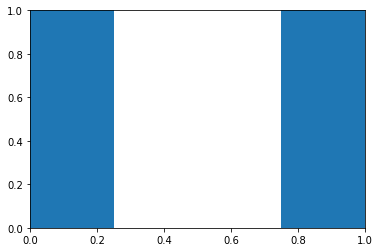

In [93]:
toronto['stars'] 

In [71]:
business.loc[0][4]

'NC'